In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [4]:

residues_to_plot = [0]
num_residues = len(residues_to_plot)

omegas_by_replica = []
save_dir = 'data'
all_omega=Data.load(f"{save_dir}/data.pkl").array_list # This is an (716, x, 3) array


In [13]:
len(all_omega)

all_omega[0].shape
all_omega[0]

array([[-173.65106   ,    8.187268  ,  158.7122    ],
       [ 149.942     ,   -5.472654  , -179.34113   ],
       [ 162.98587   ,    2.9294653 , -170.57141   ],
       ...,
       [ -29.557102  ,  -18.875021  , -179.608     ],
       [   0.69118434,  -37.369278  ,  170.23145   ],
       [ -12.828786  ,  -13.136788  , -177.94997   ]], dtype=float32)

In [12]:
all_omega[1].shape

(74022, 3)

In [15]:
def omega2cistrans(omega):
    """Converts a sequence of float omega angles (in degrees) to an array of ints: 0 cis and 1 trans."""
    
    shifted_omega = (omega + 90.0) % 360.0 - 90.0 # shift into (-90, 270) range to avoid periodic boundaries
    
    cistrans = np.where(shifted_omega > 90.0, 1, 0).astype(int)
    return cistrans

In [25]:
ntraj = len(all_omega)
all_cistrans = []
for i in range(ntraj):
    all_cistrans.append(omega2cistrans(all_omega[i]))

all_cistrans

# Find the longest traj
maxlength = max( [ len(all_cistrans[i]) for i in range(ntraj) ])
print('maxlength', maxlength)

# Make an array to store all the trajectories
traj = np.nan * np.ones( (ntraj, maxlength, 3) )

for i in range(ntraj):
    n = len(all_cistrans[i])
    traj[i, 0:n, :] = all_cistrans[i]

# traj

maxlength 142011


In [37]:
# Compute the average over all trajectories for non-nan entries

n_included = np.sum(np.where(np.isnan(traj[:,:,:]), 0, 1), axis=0)
print('n_included', n_included, 'n_included.shape', n_included.shape)

p_trans = np.nanmean(traj, axis=0)
p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5

print('p_trans', p_trans)
print('p_trans_std', p_trans_std)


n_included [[742 742 742]
 [742 742 742]
 [742 742 742]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]] n_included.shape (142011, 3)
p_trans [[0.63342318 0.45552561 0.48921833]
 [0.63342318 0.45552561 0.48787062]
 [0.63342318 0.45552561 0.48787062]
 ...
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]]
p_trans_std [[0.01770192 0.01829515 0.01836369]
 [0.01770192 0.01829515 0.01836255]
 [0.01770192 0.01829515 0.01836255]
 ...
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]]


/var/folders/5r/2qj0ct2j31v18xdl36cvtwn4q0_y41/T/ipykernel_63877/820161640.py:7: RuntimeWarning: invalid value encountered in divide
  p_trans_std = ((np.nanvar(traj, axis=0)) / (n_included-1))**0.5


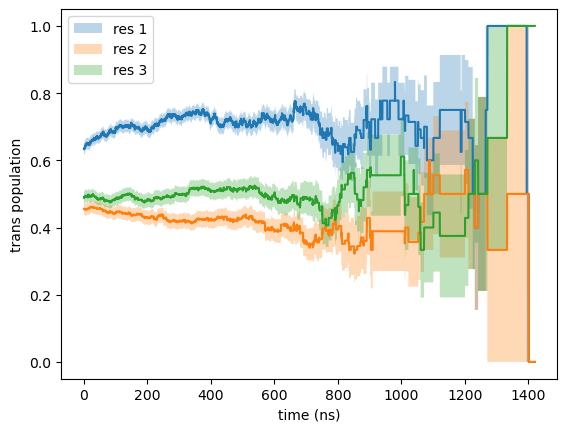

In [40]:
plt.figure()

ns_per_step = 0.01
time_in_ns = np.arange(maxlength)*ns_per_step

plt.plot(time_in_ns, p_trans) # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,0], (p_trans-p_trans_std)[:,0], alpha=0.3, lw=1, label='res 1') # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,1], (p_trans-p_trans_std)[:,1], alpha=0.3, lw=1, label='res 2') # all three residues
plt.fill_between(time_in_ns, (p_trans+p_trans_std)[:,2], (p_trans-p_trans_std)[:,2], alpha=0.3, lw=1, label='res 3') # all three residues
plt.xlabel('time (ns)')
plt.ylabel('trans population')
plt.legend(loc='best')